meta machine_learning baseline:

1.针对回归

2.包含逻辑回归，决策树，随机森林，xgboost模型

3.可根据需求自动调整超参数

待改进：
1.加入特征工程
3.加入回归分析
4.加入神经网络方法(tensorflow框架)

以bmi预测为例

In [1]:
from sklearn.ensemble import RandomForestClassifier

/Users/shizhiluo/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.utils import column_or_1d
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold

In [4]:
help(StratifiedKFold)

Help on class StratifiedKFold in module sklearn.model_selection._split:

class StratifiedKFold(_BaseKFold)
 |  Stratified K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets.
 |  
 |  This cross-validation object is a variation of KFold that returns
 |  stratified folds. The folds are made by preserving the percentage of
 |  samples for each class.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=3
 |      Number of folds. Must be at least 2.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle each stratification of the data before splitting
 |      into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number generator;
 |      If RandomState instance, random_state is the random number generator;
 |      If None, the random number generator is the RandomSt

In [9]:
import numpy as np
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf=StratifiedKFold(n_splits=2,shuffle=True, random_state=1)
skf.

<generator object _BaseKFold.split at 0x1137c2678>

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
def evalu(y_test, y_pred):
    print("explained_variance_score:", explained_variance_score(y_test,y_pred),"越接近1越好")
    print("mean_absolute_error:", mean_absolute_error(y_test,y_pred))
    print("mean_squared_error:", mean_squared_error(y_test,y_pred))
    print("median_absolute_error:", median_absolute_error(y_test,y_pred))
    print("r2_score:", r2_score(y_test,y_pred))

## 数据处理

In [7]:
#data = pd.read_table("../data/merge.metaphlan_tables.tree.merge.metadata.new.noLD16_2",index_col=0,header='infer')
data = pd.read_table("../data/merge.metaphlan_tables.tree.merge.metadata.new.noLD16_2", header=None)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,812,813,814,815,816,817,818,819,820,821
0,project,age,bmi,gender,whr,dis_CRC,dis_HBV,dis_T2D,Cholesterol,TG,...,k__Viruses|p__Viruses_noname|c__Viruses_noname...,k__Viruses|p__Viruses_noname|c__Viruses_noname...,k__Viruses|p__Viruses_noname|c__Viruses_noname...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...,k__Bacteria|p__Proteobacteria|c__Gammaproteoba...,k__Bacteria|p__Proteobacteria|c__Gammaproteoba...,k__Bacteria|p__Candidatus_Saccharibacteria|c__...,k__Bacteria|p__Candidatus_Saccharibacteria|c__...
1,austria.crc.advanced_adenoma,78,24,female,0.87,advanced_adenoma,NaN,NaN,NaN,144,...,0,0,0,0,0,0,0,0,0,0
2,austria.crc.advanced_adenoma,48,25.61,male,0.87,advanced_adenoma,NaN,NaN,NaN,75,...,0,0,0,0,0,0,0,0,0,0
3,austria.crc.advanced_adenoma,67,27.14,male,NaN,advanced_adenoma,NaN,NaN,NaN,137,...,0,0,0,0,0,0,0,0,0,0
4,austria.crc.advanced_adenoma,61,22.8,female,0.88,advanced_adenoma,NaN,NaN,NaN,82,...,0,0,0,0,0,0.08264,0,0,0,0.00051


In [10]:
y_title_index=8
y_title = data.loc[0,y_title_index]

In [11]:
x_df=data.loc[1:,31:]
y_df=data.loc[1:,y_title_index]

In [195]:
def filter_x_y(x_df, y_df):
    y_data=y_df[y_df.isnull().values==False]
    x_tmp=x_df.loc[y_df.isnull().values==False,:]
    x_tmp=pd.DataFrame(x_tmp,dtype=np.float)
    x_data=x_tmp.loc[:,(x_tmp==0).sum(axis=0)/x_tmp.shape[0]<0.9]
    if len(y_data.unique()) * 20 > x_data.shape[0]:
        lable_type = "regress"
    else:
        lable_type = "classify"
    if lable_type == "regress":
        y_data = pd.DataFrame(y_data,dtype=np.float)
    return x_data, y_data, lable_type

In [196]:
x_data, y_data, lable_type= filter_x_y(x_df, y_df)

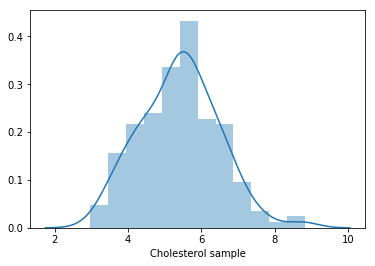

In [175]:
%matplotlib inline
#pyplot.figure(figsize=(15.0, 10.0))
if lable_type == "classify":   
    sns.countplot(y_data)
    pyplot.xlabel(y_title+" sample");
    pyplot.savefig("./temp.png")
else:
    sns.distplot(y_data, hist=True, kde=True)
    pyplot.xlabel(y_title+" sample");
    pyplot.savefig("./temp.png")


In [176]:
y_test

,8
807,7.01
805,7.05
858,4.40
853,6.67
724,4.13
786,5.43
850,6.35
720,5.84
730,4.72
750,4.70


In [201]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2)

In [202]:
y_train=column_or_1d(y_train, warn=True)

In [203]:
y_train

array([4.91, 5.76, 6.51, 4.6 , 7.46, 4.32, 6.88, 4.38, 4.92, 4.25, 5.07,
       4.61, 4.4 , 5.23, 5.26, 5.73, 5.42, 3.49, 4.38, 5.18, 5.82, 6.74,
       4.52, 7.  , 5.35, 5.39, 5.66, 4.12, 6.42, 6.43, 5.29, 5.31, 6.24,
       5.4 , 3.87, 5.25, 6.48, 5.65, 6.6 , 4.28, 5.05, 3.78, 6.55, 5.51,
       6.04, 5.37, 4.97, 5.71, 5.55, 3.34, 5.39, 3.42, 4.81, 5.74, 7.44,
       6.01, 5.41, 8.71, 5.72, 3.53, 5.49, 5.61, 4.8 , 6.58, 6.35, 4.17,
       4.72, 5.2 , 3.72, 2.96, 5.59, 3.56, 5.91, 5.24, 6.67, 5.51, 6.23,
       7.05, 6.1 , 4.04, 5.83, 6.65, 4.48, 6.72, 5.1 , 4.7 , 4.71, 7.62,
       5.15, 4.41, 6.39, 4.79, 4.19, 5.73, 7.1 , 4.5 , 5.85, 4.94, 3.24,
       6.1 , 5.43, 6.83, 6.99, 5.48, 4.73, 5.49, 4.51, 5.38, 7.01, 5.94,
       5.84, 3.5 , 5.56, 4.51, 3.71, 6.45, 5.25, 4.7 , 5.44, 5.39, 5.41,
       6.3 , 5.34, 6.65, 7.01, 5.88, 4.15, 5.14, 5.73, 4.47, 5.88, 6.23,
       4.13, 6.09, 4.4 , 4.39])

In [180]:
# labelencoder=LabelEncoder()
# labelencoder.fit_transform(y_train)

## 决策树

In [181]:
from sklearn.tree import DecisionTreeRegressor

In [182]:
tree_model = DecisionTreeRegressor()

In [183]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [184]:
y_pred = tree_model.predict(X_test)
tree_model.score(X_test, y_pred)
evalu(y_test, y_pred)

explained_variance_score: -0.7058894502677024 越接近1越好
mean_absolute_error: 1.1489473684210525
mean_squared_error: 2.0995771929824563
median_absolute_error: 0.7999999999999994
r2_score: -0.7204184624665735


In [128]:
y_train

array([5.51, 6.99, 4.5 , 5.88, 4.81, 5.41, 8.83, 6.45, 6.4 , 6.03, 4.4 ,
       3.82, 6.09, 6.83, 5.49, 5.2 , 5.35, 5.85, 5.31, 6.74, 5.39, 5.71,
       3.78, 4.19, 7.62, 6.39, 5.14, 5.59, 2.96, 6.58, 6.72, 5.07, 7.44,
       5.66, 6.03, 4.52, 3.95, 3.42, 5.74, 5.65, 5.76, 4.11, 5.44, 5.23,
       4.73, 4.28, 4.83, 6.55, 5.73, 6.43, 4.92, 3.75, 6.6 , 5.18, 5.38,
       5.75, 7.1 , 6.15, 4.94, 3.71, 5.72, 6.28, 5.73, 7.46, 4.15, 4.25,
       4.47, 5.55, 5.82, 6.1 , 3.72, 5.48, 4.6 , 3.34, 3.92, 5.73, 4.48,
       4.9 , 5.1 , 5.34, 6.23, 6.08, 4.13, 7.18, 4.04, 5.51, 5.61, 4.7 ,
       3.87, 5.8 , 3.49, 6.42, 5.44, 4.51, 4.17, 4.81, 6.47, 5.02, 5.31,
       5.25, 4.79, 5.4 , 5.15, 5.24, 5.39, 5.84, 5.34, 3.87, 4.97, 6.88,
       7.01, 4.61, 3.24])

In [185]:
y_pred = tree_model.predict(X_train)
evalu(y_train, y_pred)

explained_variance_score: 1.0 越接近1越好
mean_absolute_error: 0.0
mean_squared_error: 0.0
median_absolute_error: 0.0
r2_score: 1.0


### 超参数调整

In [130]:
tree_model2 = DecisionTreeRegressor()
tuned_parameters= { 'max_features': ["auto","sqrt","log2"],
                  'min_samples_leaf': range(1,10,1) , 'max_depth': range(1,10,1)
                  }

In [131]:
TM = GridSearchCV(tree_model2, tuned_parameters,cv=10)

In [132]:
TM.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': range(1, 10), 'max_depth': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [135]:
print(TM.best_params_)

{'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 6}


In [136]:
y_pred = tree_model.predict(X_test)
tree_model.score(X_test, y_pred)
evalu(y_test, y_pred)

explained_variance_score: -0.5397139891315716 越接近1越好
mean_absolute_error: 1.122280701754386
mean_squared_error: 1.8491631578947367
median_absolute_error: 1.1100000000000003
r2_score: -0.6174256405070913


In [137]:
y_pred = tree_model.predict(X_train)
evalu(y_train, y_pred)

explained_variance_score: 1.0 越接近1越好
mean_absolute_error: 0.0
mean_squared_error: 0.0
median_absolute_error: 0.0
r2_score: 1.0


## 随机森林

In [240]:
from sklearn.ensemble import RandomForestRegressor

In [246]:
rr_model=RandomForestRegressor(verbose=True)

In [242]:
help(RandomForestRegressor.fit)

Help on function fit in module sklearn.ensemble.forest:

fit(self, X, y, sample_weight=None)
    Build a forest of trees from the training set (X, y).
    
    Parameters
    ----------
    X : array-like or sparse matrix of shape = [n_samples, n_features]
        The training input samples. Internally, its dtype will be converted to
        ``dtype=np.float32``. If a sparse matrix is provided, it will be
        converted into a sparse ``csc_matrix``.
    
    y : array-like, shape = [n_samples] or [n_samples, n_outputs]
        The target values (class labels in classification, real numbers in
        regression).
    
    sample_weight : array-like, shape = [n_samples] or None
        Sample weights. If None, then samples are equally weighted. Splits
        that would create child nodes with net zero or negative weight are
        ignored while searching for a split in each node. In the case of
        classification, splits are also ignored if they would result in any
        sing

In [247]:
rr_model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=True,
           warm_start=False)

In [107]:
y_pred = tree_model.predict(X_test)
tree_model.score(X_test, y_pred)
evalu(y_test, y_pred)

explained_variance_score: -1.6769072097985185 越接近1越好
mean_absolute_error: 1.3514705882352942
mean_squared_error: 2.8244205882352946
median_absolute_error: 1.3000000000000003
r2_score: -1.7758895857407824


In [108]:
y_pred = tree_model.predict(X_train)
evalu(y_train, y_pred)

explained_variance_score: 1.0 越接近1越好
mean_absolute_error: 0.0
mean_squared_error: 0.0
median_absolute_error: 0.0
r2_score: 1.0


### 超参数调整

In [459]:
tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,500,10),
                    'max_features':['auto','sqrt','log2']
                    }
RR = GridSearchCV(rr_model, tuned_parameters,cv=10)

In [248]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries
 |      Dictionary with parameters names (string) as ke

In [460]:
RR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(10, 100, 10), 'n_estimators': range(10, 100, 10), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [427]:
y_pred = tree_model.predict(X_test)
tree_model.score(X_test, y_pred)
evalu(y_test, y_pred)

explained_variance_score: -0.5598673067283451 越接近1越好
mean_absolute_error: 1.0570588235294118
mean_squared_error: 1.8553235294117647
median_absolute_error: 0.8399999999999999
r2_score: -0.6106079522093957


## XGBoost

In [109]:
#from sklearn import preprocessing
#lbl = preprocessing.LabelEncoder()
#train_x['acc_id1'] = lbl.fit_transform(train_x['acc_id1'].astype(str))#将提示的包含错误数据类型这一列进行转换

In [252]:
from xgboost import XGBRegressor
XGB_model=XGBRegressor(max_depth=5,learning_rate=0.1,verbose=True,n_estimators=200)  
# XGB_model=XGBClassifier(objective= 'multi:softprob') # 多分类

In [253]:
eval_set = [(X_train, y_train)]
XGB_model.fit(X_train,y_train,eval_set=eval_set,verbose=True)

[0]	validation_0-rmse:4.51616
[1]	validation_0-rmse:4.09213
[2]	validation_0-rmse:3.71194
[3]	validation_0-rmse:3.37021
[4]	validation_0-rmse:3.06114
[5]	validation_0-rmse:2.7841
[6]	validation_0-rmse:2.53683
[7]	validation_0-rmse:2.3131
[8]	validation_0-rmse:2.11024
[9]	validation_0-rmse:1.92395
[10]	validation_0-rmse:1.75688
[11]	validation_0-rmse:1.60425
[12]	validation_0-rmse:1.46672
[13]	validation_0-rmse:1.34166
[14]	validation_0-rmse:1.22924
[15]	validation_0-rmse:1.12744
[16]	validation_0-rmse:1.03471
[17]	validation_0-rmse:0.951077
[18]	validation_0-rmse:0.875088
[19]	validation_0-rmse:0.805853
[20]	validation_0-rmse:0.743365
[21]	validation_0-rmse:0.684455
[22]	validation_0-rmse:0.631442
[23]	validation_0-rmse:0.583811
[24]	validation_0-rmse:0.539535
[25]	validation_0-rmse:0.499832
[26]	validation_0-rmse:0.461854
[27]	validation_0-rmse:0.429025
[28]	validation_0-rmse:0.398513
[29]	validation_0-rmse:0.370768
[30]	validation_0-rmse:0.344006
[31]	validation_0-rmse:0.321394
[32]	

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, verbose=True)

In [256]:
eval_set = [(X_test, y_test)]
XGB_model.fit(X_train,y_train,eval_set=eval_set,verbose=True)

[0]	validation_0-rmse:4.66372
[1]	validation_0-rmse:4.26316
[2]	validation_0-rmse:3.89255
[3]	validation_0-rmse:3.57508
[4]	validation_0-rmse:3.28461
[5]	validation_0-rmse:3.03818
[6]	validation_0-rmse:2.82011
[7]	validation_0-rmse:2.64038
[8]	validation_0-rmse:2.47037
[9]	validation_0-rmse:2.29194
[10]	validation_0-rmse:2.16315
[11]	validation_0-rmse:2.0376
[12]	validation_0-rmse:1.92927
[13]	validation_0-rmse:1.831
[14]	validation_0-rmse:1.74207
[15]	validation_0-rmse:1.67695
[16]	validation_0-rmse:1.60883
[17]	validation_0-rmse:1.56682
[18]	validation_0-rmse:1.52025
[19]	validation_0-rmse:1.47468
[20]	validation_0-rmse:1.44741
[21]	validation_0-rmse:1.42675
[22]	validation_0-rmse:1.40188
[23]	validation_0-rmse:1.37183
[24]	validation_0-rmse:1.35053
[25]	validation_0-rmse:1.33471
[26]	validation_0-rmse:1.32308
[27]	validation_0-rmse:1.31639
[28]	validation_0-rmse:1.31197
[29]	validation_0-rmse:1.30185
[30]	validation_0-rmse:1.2916
[31]	validation_0-rmse:1.28466
[32]	validation_0-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, verbose=True)

In [255]:
y_pred = XGB_model.predict(X_test)
XGB_model.score(X_test, y_pred)
evalu(y_test, y_pred)

explained_variance_score: -0.11030833643675142 越接近1越好
mean_absolute_error: 0.967518866482903
mean_squared_error: 1.5844191801563159
median_absolute_error: 0.8034601688385008
r2_score: -0.13438254190769516


In [254]:
y_pred = XGB_model.predict(X_train)
evalu(y_train, y_pred)

explained_variance_score: 0.9999998224653982 越接近1越好
mean_absolute_error: 0.00032646487740907367
mean_squared_error: 1.9114968446074953e-07
median_absolute_error: 0.0002623462677000532
r2_score: 0.9999998224635729


In [25]:
print(XGB_model.feature_importances_)

[0.00153561 0.00527742 0.01120412 0.02320008 0.00365687 0.00863486
 0.0315629  0.02448498 0.00824199 0.01315442 0.02825086 0.00389032
 0.00782227 0.02494201 0.00560086 0.03832502 0.00326854 0.00961272
 0.02290437 0.02951537 0.00982624 0.02673565 0.00667023 0.01993603
 0.02356114 0.00302439 0.01299371 0.01602833 0.00965167 0.01373242
 0.00233139 0.0248308  0.02015337 0.00485    0.0009356  0.01589436
 0.02464838 0.02012677 0.02653887 0.03397303 0.01272395 0.01324642
 0.00488051 0.00677778 0.00993506 0.02151003 0.02870334 0.06596873
 0.00670753 0.01223959 0.00942217 0.01191725 0.01335743 0.00804259
 0.02240744 0.01190659 0.0068285  0.02663179 0.03610566 0.01109584
 0.00178001 0.00620313 0.01693356 0.01314718]


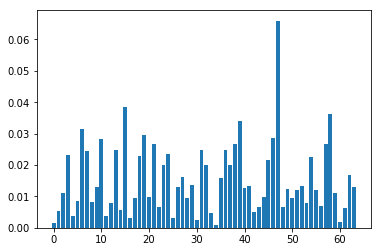

In [26]:
# plot
from matplotlib import pyplot
pyplot.bar(range(len(XGB_model.feature_importances_)), XGB_model.feature_importances_)
pyplot.show()

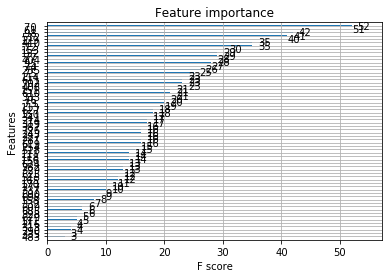

In [27]:
# plot feature importance using built-in function
from xgboost import plot_importance
plot_importance(XGB_model)
pyplot.show()

###  特征选择

In [28]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
gbdt_RFE = RFE(model, int(0.8*X_train.shape[1]))
gbdt_RFE.fit(X_train, y_train)
gbdt_RFE.ranking_
#特征选择输出结果
#gbdt_RFE.support_
#输出结果为：


array([ 1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  9,  1,  1,  2,  7,  1, 11,  1,  1,  1,  1,  1,  1,  1, 13,
        6,  1,  1,  8,  1,  1, 12,  1,  1,  1,  1,  5,  1, 14,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  4,  1,  1])

In [29]:
X_train.shape

(136, 64)

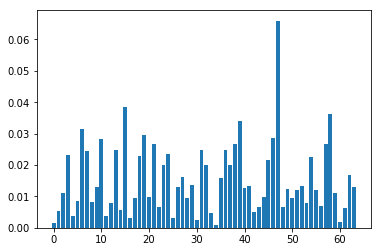

In [30]:
pyplot.bar(range(len(XGB_model.feature_importances_)), XGB_model.feature_importances_)
pyplot.show()

### 参数选择

In [25]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[1,1],[2,2]])
y = np.array([0, 0, 1, 1,1,0])
skf = StratifiedKFold(3,random_state=1)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print("i:",i,"TRAIN:", train_index, "TEST:", test_index)
    for s in test_index:
        print(s)

i: 0 TRAIN: [1 3 4 5] TEST: [0 2]
0
2
i: 1 TRAIN: [0 2 4 5] TEST: [1 3]
1
3
i: 2 TRAIN: [0 1 2 3] TEST: [4 5]
4
5


In [33]:
help(StratifiedKFold)

Help on class StratifiedKFold in module sklearn.model_selection._split:

class StratifiedKFold(_BaseKFold)
 |  Stratified K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets.
 |  
 |  This cross-validation object is a variation of KFold that returns
 |  stratified folds. The folds are made by preserving the percentage of
 |  samples for each class.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=3
 |      Number of folds. Must be at least 2.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle each stratification of the data before splitting
 |      into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number generator;
 |      If RandomState instance, random_state is the random number generator;
 |      If None, the random number generator is the RandomSt

In [234]:
def modelfit(alg, X_train, y_train, useTrainCV=True, early_stopping_rounds=40):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        
        train_data = xgb.DMatrix(X_train, label=y_train, missing=float('nan'))
        cvresult = xgb.cv(xgb_param, train_data, num_boost_round=alg.get_params()['n_estimators'], nfold =5,
             metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        
        n_estimators = cvresult.shape[0]
        alg.set_params(n_estimators = n_estimators)
        alg.set_params(learning_rate = 0.02)
        print(cvresult)
        #result = pd.DataFrame(cvresult)   #cv缺省返回结果为DataFrame
        #result.to_csv('my_preds.csv', index_label = 'n_estimators')
        cvresult.to_csv('my_preds_4_1.csv', index_label = 'n_estimators')
        
        # plot
        #test_means = cvresult['test-mlogloss-mean']
        #test_stds = cvresult['test-mlogloss-std'] 
        
        #train_means = cvresult['train-mlogloss-mean']
        #train_stds = cvresult['train-mlogloss-std'] 

        #x_axis = range(0, n_estimators)
        #pyplot.errorbar(x_axis, test_means, yerr=test_stds ,label='Test')
        #pyplot.errorbar(x_axis, train_means, yerr=train_stds ,label='Train')
        #pyplot.title("XGBoost n_estimators vs Log Loss")
        #pyplot.xlabel( 'n_estimators' )
        #pyplot.ylabel( 'Log Loss' )
        #pyplot.savefig( 'n_estimators.png' )
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    y_pred = alg.predict(X_train)
    evalu(y_train, y_pred)
    return alg


In [235]:
XGB_model.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.02,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 33,
 'nthread': 1,
 'objective': 'reg:linear',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'silent': True,
 'subsample': 1,
 'verbosity': 0}

In [236]:
X_train1=X_train.replace(0,np.nan)
X_test1=y_test.replace(0,np.nan)

In [ ]:
# XGB_model=XGBRegressor(max_depth=6)  
model2=modelfit(XGB_model, X_train, y_train)

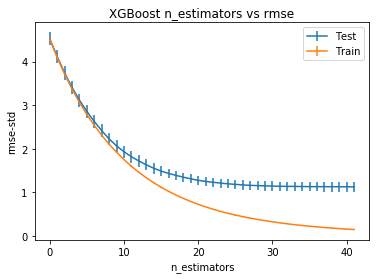

In [238]:
cvresult = pd.DataFrame.from_csv('my_preds_4_1.csv')
        
# plot
test_means = cvresult['test-rmse-mean']
test_stds = cvresult['test-rmse-std'] 
        
train_means = cvresult['train-rmse-mean']
train_stds = cvresult['train-rmse-std'] 

x_axis = range(0, cvresult.shape[0])
        
pyplot.errorbar(x_axis, test_means, yerr=test_stds ,label='Test')
pyplot.errorbar(x_axis, train_means, yerr=train_stds ,label='Train')
pyplot.title("XGBoost n_estimators vs rmse")
pyplot.xlabel( 'n_estimators')
pyplot.ylabel( 'rmse-std' )
pyplot.legend()
pyplot.savefig( 'n_estimators4_1.png' )


In [249]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries
 |      Dictionary with parameters names (string) as ke

In [64]:
model2.predict(X_test)

array([6.0093184, 5.445152 , 4.867327 , 4.598325 , 5.014253 , 3.958854 ,
       5.32154  , 5.253059 , 5.5825653, 5.388024 , 4.9734144, 5.6429524,
       5.080106 , 4.872859 , 4.5703444, 4.8155637, 5.513289 , 5.127613 ,
       4.5042696, 5.0479097, 5.245301 , 5.462021 , 5.6713257, 5.49961  ,
       4.858288 , 5.516447 , 4.9598913, 5.0579996, 4.899659 , 4.216854 ,
       5.490884 , 5.099413 , 4.588899 , 4.784512 ], dtype=float32)

In [71]:
y_pred = model2.predict(X_test)
evalu(y_test, y_pred)

explained_variance_score: -0.15338225646038484 越接近1越好
mean_absolute_error: 0.9345443240334006
mean_squared_error: 1.432011156317457
median_absolute_error: 0.9742831420898437
r2_score: -0.2431301169067377


In [200]:
X_train1

,95,151,227,255,281,282,328,329,333,341,408,410,512,609,611,625,629,690,702
868,0.21665,0.88219,0.04984,1.42515,0.50316,1.36946,0.81417,0.77809,3.68838,3.34931,0.04667,0.01206,0.01894,0.40095,1.93523,0.99138,1.46274,0.31146,3.03461
736,0.13166,NaN,0.53613,0.87813,0.35152,0.97828,0.12497,2.05840,24.05715,8.29215,0.02381,0.02490,0.33430,0.17264,0.80085,0.57797,0.53797,0.01671,14.48115
869,0.02171,1.61407,0.62370,1.02824,0.25232,1.80161,0.42362,2.34287,22.86243,5.64347,0.46603,NaN,0.06362,0.02620,0.90634,0.92651,1.53389,0.15329,6.77172
864,0.05876,6.25162,0.02937,0.08661,0.15397,0.02480,0.42012,1.69665,0.04387,0.62999,0.30132,0.09270,0.01189,0.04555,0.00038,0.48827,1.23912,0.15705,18.24170
756,0.06799,0.97867,0.16832,NaN,1.01265,4.24549,0.03225,2.50411,27.12543,7.57322,0.32966,0.00982,0.21648,0.05139,0.52041,0.99326,1.66178,1.59456,1.86928
737,0.02062,1.69398,0.01813,NaN,1.08985,1.06756,1.13181,0.29836,21.69010,7.57267,0.04062,0.04818,0.16694,0.36983,1.50510,1.39289,1.17217,0.12309,8.45865
797,0.03385,0.85393,0.00860,0.23050,0.36963,0.42680,4.11528,0.67918,0.63434,7.06480,0.02577,0.02745,0.14168,0.70556,0.33778,0.90136,0.75658,0.03949,10.02541
746,0.01147,2.49746,0.02023,1.13841,0.73311,1.56417,0.26545,0.17630,7.21582,8.95995,0.48772,0.04295,0.12646,0.36928,0.17894,1.94130,0.83185,0.20342,7.85651
790,0.08797,5.51194,0.05585,0.59987,1.32968,0.90234,5.09951,4.89462,5.14207,2.74218,0.18407,0.01817,0.16725,0.30772,0.76981,1.08495,1.21542,0.09419,8.04926
863,0.09491,1.31921,0.01431,2.01048,0.50664,0.87318,8.17920,2.23231,0.00046,13.19897,0.73339,0.01593,0.04562,0.41027,3.16531,1.82837,1.02263,0.20157,22.97987
